In [1]:
import os
from snn_delays.config import CHECKPOINT_PATH
from hwsnn.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ckpt_dir = 'exp7_shd_50_b1024_sweep_learnig_rate_also_tau'
models_dir = os.path.join(CHECKPOINT_PATH, ckpt_dir)

models = []
batch_size = 256
device = 'cpu'
for _, __, files in os.walk(models_dir, topdown=False):
    for name in files:
        if '.py' not in name:
            models.append(name)

data_fd = []

for model_name in models:
    if 'max' in model_name and model_name[:2]=='lr':
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_fd.append([model_name.split('_')[0][2:],model_name.split('_')[1][3:], acc])
        # print(f"accuracy: {acc}")
        # print("-------------------------------------")

data_ffw = []

for model_name in models:
    if 'max' in model_name and 'ffw' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_ffw.append([model_name.split('_')[1][2:],model_name.split('_')[2][3:], acc])
        # print(f"accuracy: {acc}")
        # print("-------------------------------------")

data_rec = []

for model_name in models:
    if 'max' in model_name and 'rec' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_rec.append([model_name.split('_')[1][2:],model_name.split('_')[2][3:], acc])

loading lr0.0001_lrt0.0001_shd50_SNN_l2_48d16.t7_7963780918727915_max_99epoch


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
loading lr0.0001_lrt0.001_shd50_SNN_l2_48d16.t7_7826855123674912_max_96epoch

[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
loading lr0.0001_lrt0.01_shd50_SNN_l2_48d16.t7_7707597173144876_max_85epoch

[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
loading lr0.0001_lrt0.1_shd50_SNN_l2_48d16.t7_7411660777385158_max_92epoch

[IN

In [3]:
data_fd = [[float(d[0]), float(d[1]), d[2]] for d in data_fd]
data_fd

[[0.0001, 0.0001, 79.63780918727915],
 [0.0001, 0.001, 78.26855123674912],
 [0.0001, 0.01, 77.07597173144876],
 [0.0001, 0.1, 74.11660777385158],
 [0.0001, 1.0, 67.18197879858657],
 [0.0001, 10.0, 59.187279151943464],
 [0.0001, 5.0, 44.522968197879855],
 [0.001, 0.0001, 83.39222614840989],
 [0.001, 0.001, 83.03886925795052],
 [0.001, 0.01, 83.8339222614841],
 [0.001, 0.1, 84.01060070671377],
 [0.001, 1.0, 81.93462897526501],
 [0.001, 10.0, 77.7826855123675],
 [0.001, 5.0, 74.38162544169612],
 [0.005, 0.0001, 81.00706713780919],
 [0.005, 0.001, 77.82685512367492],
 [0.005, 0.01, 80.21201413427562],
 [0.005, 0.1, 78.57773851590106],
 [0.005, 1.0, 72.6148409893993],
 [0.005, 10.0, 74.51413427561837],
 [0.005, 5.0, 77.12014134275618],
 [0.01, 0.0001, 78.18021201413427],
 [0.01, 0.001, 75.08833922261483],
 [0.01, 0.01, 78.97526501766785],
 [0.01, 0.1, 73.40989399293287],
 [0.01, 1.0, 69.1696113074205],
 [0.01, 10.0, 69.78798586572438],
 [0.01, 5.0, 67.00530035335689]]

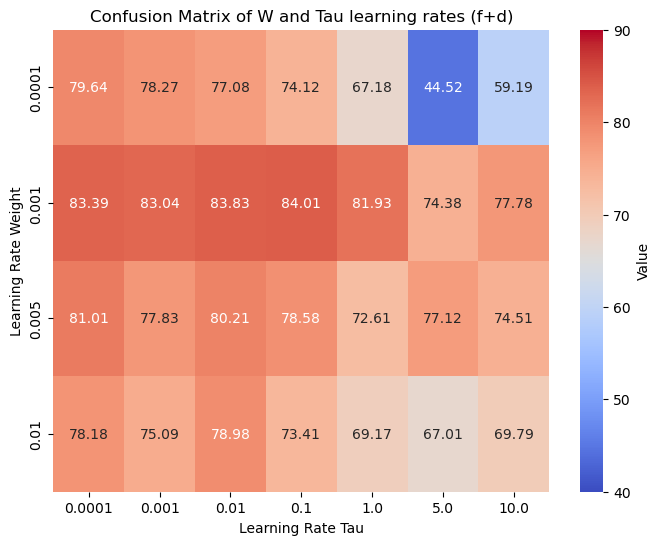

In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(data_fd, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Define the new order for both axes
learning_rate_order = [0.0001, 0.001, 0.005, 0.01]
learning_rate_tau_order = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]

# Pivot the DataFrame and reorder the axes
matrix_df_new_ordered = df.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")
matrix_df_new_ordered = matrix_df_new_ordered.reindex(index=learning_rate_order, columns=learning_rate_tau_order)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_new_ordered, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (f+d)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

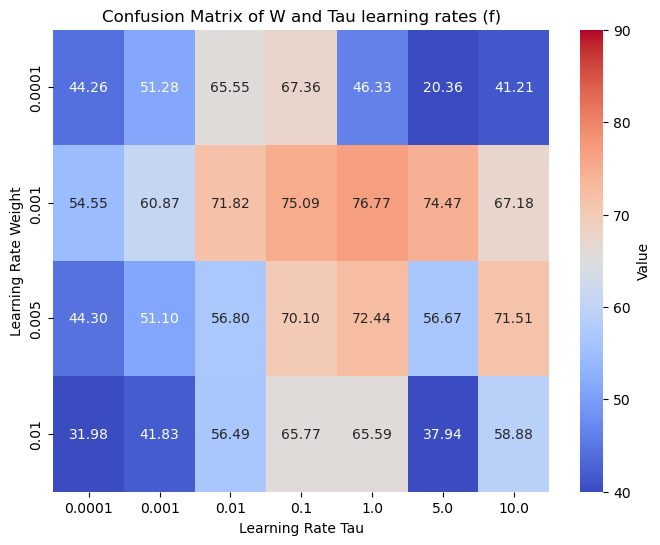

In [5]:
data_ffw = [[float(d[0]), float(d[1]), d[2]] for d in data_ffw]

# Convert data to DataFrame
df = pd.DataFrame(data_ffw, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Pivot the DataFrame and reorder the axes
matrix_df_new_ordered = df.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")
matrix_df_new_ordered = matrix_df_new_ordered.reindex(index=learning_rate_order, columns=learning_rate_tau_order)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_new_ordered, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (f)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

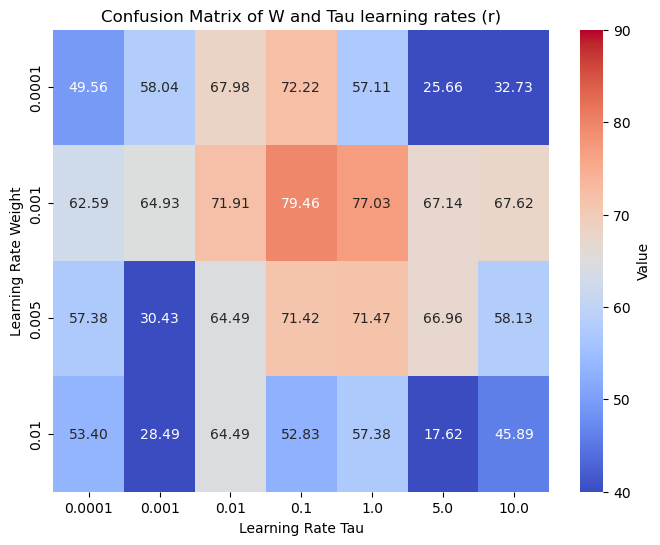

In [6]:
data_rec = [[float(d[0]), float(d[1]), d[2]] for d in data_rec]

# Convert data to DataFrame
df = pd.DataFrame(data_rec, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Pivot the DataFrame and reorder the axes
matrix_df_new_ordered = df.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")
matrix_df_new_ordered = matrix_df_new_ordered.reindex(index=learning_rate_order, columns=learning_rate_tau_order)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_new_ordered, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (r)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

OLD

In [5]:
import os
from snn_delays.config import CHECKPOINT_PATH
from hwsnn.utils.model_loader import ModelLoader
ckpt_dir = 'exp_soa50_1024_learning_rate_final'
models_dir = os.path.join(CHECKPOINT_PATH, ckpt_dir)

models = []
batch_size = 256
device = 'cpu'
for _, __, files in os.walk(models_dir, topdown=False):
    for name in files:
        if '.py' not in name:
            models.append(name)

m = []

for model_name in models:
    if 'max' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        m.append([model_name, acc])
        print(f"accuracy: {acc}")
        print("-------------------------------------")



loading delay_lr0.0001_shd50_SNN_l2_64d16.t7_79726148409894_max_100epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 79.726148409894
-------------------------------------
loading delay_lr0.0005_shd50_SNN_l2_64d16.t7_7977031802120142_max_75epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 79.77031802120142
-------------------------------------
loading delay_lr0.001_shd50_SNN_l2_64d16.t7_8109540636042402_max_50epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16,

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 69.96466431095406
-------------------------------------
loading delay_lr0.01_shd50_SNN_l2_64d16.t7_7230565371024736_max_77epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 72.30565371024736
-------------------------------------
loading delay_lr1e-05_shd50_SNN_l2_64d16.t7_3652826855123675_max_100epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined

In [6]:
m

[['delay_lr0.0001_shd50_SNN_l2_64d16.t7_79726148409894_max_100epoch',
  79.726148409894],
 ['delay_lr0.0005_shd50_SNN_l2_64d16.t7_7977031802120142_max_75epoch',
  79.77031802120142],
 ['delay_lr0.001_shd50_SNN_l2_64d16.t7_8109540636042402_max_50epoch',
  81.09540636042402],
 ['delay_lr0.002_shd50_SNN_l2_64d16.t7_8295053003533569_max_24epoch',
  82.95053003533569],
 ['delay_lr0.003_shd50_SNN_l2_64d16.t7_7734098939929329_max_74epoch',
  77.34098939929329],
 ['delay_lr0.004_shd50_SNN_l2_64d16.t7_8149293286219081_max_38epoch',
  81.49293286219081],
 ['delay_lr0.005_shd50_SNN_l2_64d16.t7_7628091872791519_max_80epoch',
  76.28091872791519],
 ['delay_lr0.006_shd50_SNN_l2_64d16.t7_8100706713780919_max_39epoch',
  81.00706713780919],
 ['delay_lr0.007_shd50_SNN_l2_64d16.t7_8206713780918727_max_31epoch',
  82.06713780918727],
 ['delay_lr0.008_shd50_SNN_l2_64d16.t7_79726148409894_max_72epoch',
  79.726148409894],
 ['delay_lr0.009_shd50_SNN_l2_64d16.t7_6996466431095406_max_77epoch',
  69.9646643109